# The Ultimate Food Finder

The Ultimate Food Finder is an app that helps you find dishes that are not only good for your health but also delicious and easy to make by your standards. 

Almost 4 in 10 US adults are obese according to Centers for Disease Control and Prevention, costing the country $147 billion in medical bills in 2008 (Overweight & Obesity, 2018). One of the main reasons is believed to be eating behaviors, and it is not always lack of responsibility on our part that we do not eat in a healthy way. Pew Research Center did a national survey of 2,250 adults and found that 73% of those who eat junk food do so because of convenience. The main assumption of this proposal is that people do not eat unhealthy food by choice but necessity. Therefore, a tool for them to discover food with the optimal balance of health, taste and convenience will lead to a more healthy lifestyle and minimize healthcare spendings.

We sift through over 240,000 recipes on allrecipes.com to bring you the right recipe based on nutritional facts, quantity and complexity of instructions, time taken to prepare the dish, prevalence of ingredients, ratings and reviews of the recipe and from user accounts. As a proof of concept, we successfully scraped about 1% of the dataset and created plots showing tradeoffs between conveience and nutritional values as well as deliciousness. 

In [ ]:
# !pip install numpy pandas matplotlib seaborn sklearn
# !git clone https://github.com/cstorm125/kbank_alchemists
# !mv kbank_alchemists/* .
# !ls

In [3]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

DATA_PATH='data/food/'
food_df = pd.read_csv(f'{DATA_PATH}food_df.csv')
food_df.head()

,recipe_name,titles,ratings,nb_reviews,desc,ingre_names,ingre_ids,ready_time,directions,nb_servings,...,sugars,vitamin_a,vitamin_c,calcium,iron,thiamin,niacin,vitamin_b6,magnesium,folate
0,Homemade Pickled Ginger (Gari),Home|Recipes|Side Dish|Sauces and Condiments|C...,4.781250,27,"""Pickled ginger is called gari or amazu shoga ...",8 ounces fresh young ginger root peeled|1 12 t...,4343|18752|18868|1526,45 m,Cut the ginger into chunks and place them into...,32.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0
1,Chocolate Pizzelles,Home|Recipes|World Cuisine|European|Italian,4.466667,13,"""These are thin waferlike cookies and you must...",4 eggs|14 cup cocoa powder|1 cup white sugar|1...,16317|1417|1526|16386|16421|2356|16339|3797|1684,NaN,Whisk the eggs with the sugar and salt until l...,12.0,...,17.0,556.0,1.0,97.0,2.0,0.0,3.0,0.0,30.0,57.0
2,Pork and Black Bean Stew,"Home|Recipes|Soups, Stews and Chili|Stews|Pork",4.424242,78,"""My Brazilian friend makes this for me occasio...",2 tablespoons vegetable oil|1 teaspoon minced ...,6305|4342|4397|4175|2779|2496|13968|5821|16380...,1 h,Heat 1 tablespoon vegetable oil in a skillet o...,4.0,...,2.0,11.0,7.0,67.0,4.0,1.0,13.0,1.0,74.0,90.0
3,Pavlova,Home|Recipes|Desserts|Specialty Desserts|Pavlova,4.578948,16,"""My grandmother's recipe from New Zealand for ...",3 egg whites|1 teaspoon distilled white vinega...,16318|7842|2496|16424|20359|1636,NaN,Preheat oven to 300 degrees F (150 degrees C)....,8.0,...,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
4,Jalapeno Poppers of Champions,Home|Recipes|Appetizers and Snacks|Vegetable|J...,4.645714,151,"""I fashioned this delicious snack especially f...",18 fresh jalapeno peppers halved lengthwise an...,3725|16223|2864|20380,30 m,Preheat oven to 350 degrees F (175 degrees C)....,18.0,...,0.0,287.0,6.0,13.0,0.0,0.0,1.0,0.0,5.0,12.0


## Figure 1: The Convenience-Health Tradeoff

Figure 1 is a scatterplot of recipies with highest vitamins as percentage of daily intake on one axis and time used to prepare and cook the meal on the other. We also did a clustering on the recipes to determine groups of similar dishes. This allows us to choose to make the group of dishes that take less time and are more healthy. 

### Minutes of Ready Time

We will use minutes of ready time as a proxy for convenience. Here we show the distribution of ready time, as well as top 10 fastest and slowest food to cook.

count     1503.000000
mean       146.170326
std        550.395187
min          2.000000
25%         30.000000
50%         55.000000
75%        100.000000
max      10103.000000
Name: ready_min, dtype: float64

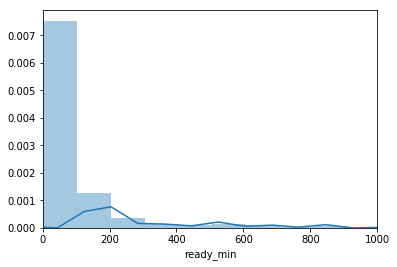

In [4]:
def unit_cov(t):
    if t=='d':
        return(60*24)
    elif t=='h':
        return(60)
    else:
        return(1)

def text_to_min(ready_time):
    if type(ready_time)!=str: return(0)
    dur = 0
    time_list = ready_time.split()
    for i in range(len(time_list)-1):
        if time_list[i].isdigit():
            dur+=int(time_list[i])*unit_cov(time_list[i+1])
    return(dur)

food_df['ready_min'] = food_df['ready_time'].apply(text_to_min)
nonzero_mins = food_df.query('ready_min>0')['ready_min']
g = sns.distplot(nonzero_mins,bins=100)
g.set(xlim=(0, 1000))
nonzero_mins.describe()

In [5]:
#top 10 fastest food to cook
food_df.query('ready_min>0').sort_values('ready_min')[['recipe_name','ready_min']].head(10)

,recipe_name,ready_min
1251,Pompous Mexican,2
77,Lemon Pisco Sour,2
1117,Tokyo Rose,2
1328,"Easiest, Amazing Guacamole",5
1545,Rocky Mountain Citrus Martini,5
1464,Black Bean Hummus,5
1724,Midwestern House Salad Dressing,5
1703,Triple Fionn MacCool,5
1927,Margarita Dressing,5
331,Virgin Strawberry Daiquiri,5


In [6]:
#top 10 slowest food to cook
food_df.query('ready_min>0').sort_values('ready_min',ascending=False)[['recipe_name','ready_min']].head(10)

,recipe_name,ready_min
1048,Pique (Puerto Rican Hot Sauce),10103
1995,Far East Spiced Olive Oil,10085
1323,Smoked Maple Syrup Bacon,7790
1067,Early American Eggnog,7260
231,Spicy Cabbage Kimchi,6180
1398,Philippine Longanisa de Eugenio (Sweet Sausage),5833
1591,Kentucky Burgoo,3500
329,Korean Kimchi,3080
1708,Clotted Cream,1680
773,Butter Bean Custard Pie,1590


### Vitamin Score

We use the amount of vitamins per serving as proportion of recommended daily intake as an indicator of a healthy meal. The vitamin proportions are weighted equally namely:

* Vitamin A
* Vitamin C
* Vitamin B6
* Thiamin
* Niacin
* Folate

Daily amount of vitamin intake is taken from Institute of Medicine (1970) for Males over 19 years old.

count    1971.000000
mean        1.531664
std         1.838840
min         0.000000
25%         0.337639
50%         0.928000
75%         2.171032
max        28.682120
Name: multi_vitamin, dtype: float64

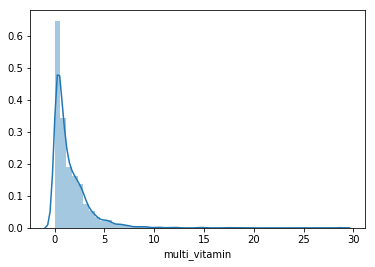

In [7]:
DAILY_VITAMIN_A = 3000 #IU
DAILY_VITAMIN_C = 90 #mg
DAILY_VITAMIN_B6 = 1.3 #mg
DAILY_THIAMIN = 1.2 #mg
DAILY_NIACIN = 16 #mg
DAILY_FOLATE = 400 #mcg

food_df['multi_vitamin'] = food_df.vitamin_a / DAILY_VITAMIN_A + \
    food_df.vitamin_c / DAILY_VITAMIN_C + food_df.vitamin_b6 / DAILY_VITAMIN_B6 +\
    food_df.thiamin / DAILY_THIAMIN + food_df.niacin / DAILY_NIACIN +\
    food_df.folate / DAILY_FOLATE

sns.distplot(food_df['multi_vitamin'].dropna())
food_df['multi_vitamin'].describe()

In [8]:
#top 10 food with highest amount of vitamins
food_df.sort_values('multi_vitamin',ascending=False)[['recipe_name','multi_vitamin']].head(10)

,recipe_name,multi_vitamin
1665,Country Fried Squash,28.682120
1641,Kentucky Bourbon Sweet Potatoes,17.423453
1336,Awesome Turkey Giblet Stock,14.753397
1124,Sweet Potato Enchiladas,14.635897
1096,Butternut Squash-Sweet Potato Ginger Bisque,12.169897
993,Seafood Gumbo,12.147833
650,Old-Fashioned Chicken And Slick Dumplings,11.437906
1356,Baked Squash and Maple Syrup,10.531333
89,Glazed Ham with Peach-Ginger Sauce,10.462073
1503,Gulyas Leves,10.362962


In [9]:
#top 10 food with lowest amount of vitamins
food_df.sort_values('multi_vitamin',ascending=True)[['recipe_name','multi_vitamin']].head(10)

,recipe_name,multi_vitamin
1695,Balsamic Vinaigrette,0.000000
377,Smooth Sweet Tea,0.000000
417,Mississippi Iced Tea,0.000000
1939,Miso Salad Dressing,0.000000
1995,Far East Spiced Olive Oil,0.000333
1994,Balsamic Vinegar and Olive Oil Dressing,0.001000
1762,Horseradish Vinaigrette,0.001667
1670,Jeera (Cumin) Rice,0.002333
1406,Apple Butter III,0.002333
0,Homemade Pickled Ginger (Gari),0.002500


### Convenience-Health Clusters

We use k-means clustering to group all recipes into arbitrary groups so we can explore in the next section which food groups are the best in terms of convenience-health tradeoff. We remove ready time and vitamin score outliers using interquartile range (remove all recipes above `Q3 + 1.5×IQR`), then mean center and normalize both numbers by standard deviation before performing the clustering.

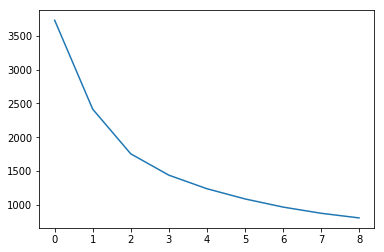

In [10]:
#filter by IQR
plot1_df = food_df.query('ready_min>0')[['ready_min','multi_vitamin','nb_calories','recipe_name']]
plot1_df.set_index('recipe_name',inplace=True)
ready_min_stats = plot1_df['ready_min'].describe()
ready_min_thres = ready_min_stats[6]+1.5*(ready_min_stats[6]-ready_min_stats[4])
multi_vitamin_stats = plot1_df['multi_vitamin'].describe()
multi_vitamin_thres = multi_vitamin_stats[6]+1.5*(multi_vitamin_stats[6]-multi_vitamin_stats[4])
plot1_df = plot1_df.query(f'ready_min<{ready_min_thres} & multi_vitamin < {multi_vitamin_thres}')
#standardize
from sklearn.preprocessing import scale
scaled1 = scale(plot1_df)
#determine number of clusters
from sklearn.cluster import KMeans  
ks = range(1, 10)
fits = [KMeans(n_clusters=k).fit(scaled1) for k in ks]
inertia = [fits[i].inertia_ for i in range(len(fits))]
plt.plot(inertia)

In [20]:
#optimal fit
k=3
fit = KMeans(n_clusters=k).fit(scaled1)
plot1_df['cluster'] = fit.labels_
plot1_df['cluster'] = plot1_df['cluster']
Counter(plot1_df['cluster'])

Counter({2: 692, 0: 364, 1: 188})

In [21]:
#first cluster
plot1_df[plot1_df.cluster==0].head()

,ready_min,multi_vitamin,nb_calories,cluster
recipe_name,,,,
Pork and Black Bean Stew,60,2.721509,482.0,0
Lobster Colorado,40,2.119897,585.0,0
Irish Stew,120,4.018509,609.0,0
Irish Champ,40,2.228175,326.0,0
Irish Bacon And Cabbage Soup,45,2.313342,276.0,0


In [22]:
#second cluster
plot1_df[plot1_df.cluster==1].head()

,ready_min,multi_vitamin,nb_calories,cluster
recipe_name,,,,
Paneer (Home Made),140,0.334389,129.0,1
Grandpa's Classic Coney Sauce,130,0.547722,186.0,1
Irish-Style Lamb Stew,145,2.315889,303.0,1
Japanese Tofu Salad,100,0.833833,272.0,1
Rugelach,197,0.159000,101.0,1


In [24]:
#first cluster
plot1_df[plot1_df.cluster==2].head()

,ready_min,multi_vitamin,nb_calories,cluster
recipe_name,,,,
Homemade Pickled Ginger (Gari),45,0.002500,14.0,2
Jalapeno Poppers of Champions,30,0.254833,73.0,2
New Brunswick Lobster Casserole,60,0.952111,384.0,2
Drommar,57,0.185667,140.0,2
Dawn's Sugar Cookies,75,0.286833,306.0,2


### The Healthiest Food Can Take Less Time

When we look at the scatterplot, we can see that the cluster of food with high vitamin scores can also take about the same amount of time as one cluster and significnatly less than the other. This invalidates the claim (excuse?) that it takes more time to cook healthy food.

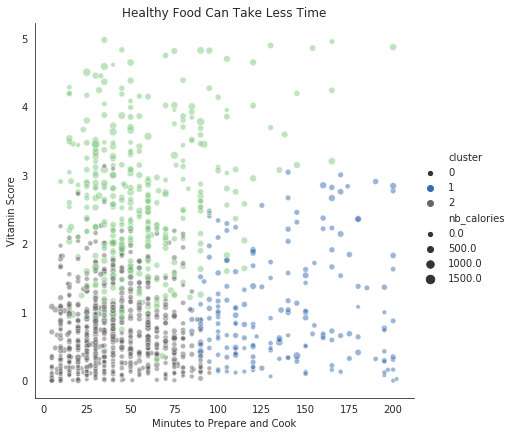

In [25]:
sns.set_style(style='white')
g = sns.relplot(x='ready_min', y='multi_vitamin',
             size='nb_calories', hue = 'cluster',
             alpha=0.5, height = 6, palette='Accent',
             data=plot1_df)
g.set(xlabel='Minutes to Prepare and Cook', ylabel='Vitamin Score',
      title='Healthy Food Can Take Less Time')
# g.savefig("figure1.png")

## Figure 2: The Convenience-Taste Tradeoff

Figure 2 is another scatterplot of recipies with ratings (normalized by number of reviews) on one axis and number of ingredients on the other (each ingredient is weighted using inverse document frequency to give more weights to rare ingredients). We can look at this plot and choose the dish that is delicious (by popular demands) and easy to make.

### Number of (Weighted) Ingredients

We use the number of ingredients mentioned in the recipe as another measure of convenience. We also weight them using inverse document frequency in order to give more weights to ingredients that rarely appear (and thus are less convenient to find).

In [26]:
ingre_list = []
for i in range(len(food_df)):
    ingre_list += food_df.iloc[i,food_df.columns.get_loc('ingre_ids')].split('|')
c = Counter(ingre_list)
print(f'There are {len(c)} ingredients.')
ingre_cols = list(c.keys())

There are 1512 ingredients.


count    2001.000000
mean        2.833996
std         0.573413
min         1.000000
25%         2.438716
50%         2.825453
75%         3.207247
max         4.790335
Name: nb_ingredients, dtype: float64

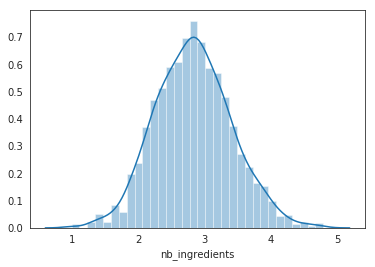

In [27]:
#get idf (because term frequency is always 1; all ingredient ids appear only once for each recipe)
from sklearn.feature_extraction.text import TfidfVectorizer
tokenize = lambda x: x.split('|')
tfidf = TfidfVectorizer(min_df=0, use_idf=True, tokenizer=tokenize)
ingredient_mat = tfidf.fit_transform(food_df['ingre_ids'])
#sum to get (weighted) number of ingredients
food_df['nb_ingredients'] = np.sum(ingredient_mat,axis=1)
sns.distplot(food_df['nb_ingredients'])
food_df['nb_ingredients'].describe()

### Ratings

People are very generous when it comes to rating others' recipies as you can see from the fact that the median ratings is above 4. We remove outliers using the same method we used earlier. We also consider only those with 20 or more reviews to prevent bias with small sample size.

count    2001.000000
mean        4.239095
std         0.596392
min         0.000000
25%         4.090909
50%         4.392857
75%         4.570115
max         5.000000
Name: ratings, dtype: float64

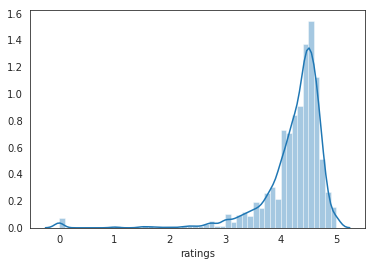

In [28]:
sns.distplot(food_df['ratings'])
food_df['ratings'].describe()

count    1090.000000
mean        4.423992
std         0.253588
min         3.459460
25%         4.292745
50%         4.468502
75%         4.599351
max         4.960000
Name: ratings, dtype: float64

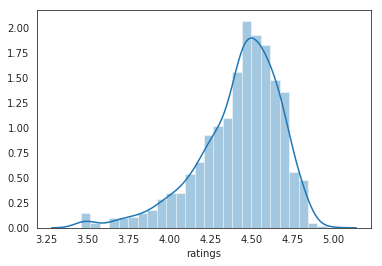

In [29]:
ratings_stats = food_df['ratings'].describe()
ratings_thres = ratings_stats[4]-1.5*(ratings_stats[6]-ratings_stats[4])
plot2_df = food_df[['ratings','nb_ingredients','nb_reviews','recipe_name']]
plot2_df.set_index('recipe_name',inplace=True)
plot2_df = plot2_df.query(f'ratings > {ratings_thres} & nb_reviews > 20')
sns.distplot(plot2_df['ratings'])
plot2_df['ratings'].describe()

### Convenience-Taste Clusters

We perform the clustering again so that we can choose which group of food has the best tradeoff in terms of convenience (according to number of ingredients) and deliciousness (as rated by people).

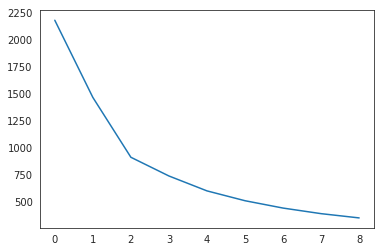

In [30]:
scaled2 = scale(plot2_df[['ratings','nb_ingredients']])
ks = range(1, 10)
fits = [KMeans(n_clusters=k).fit(scaled2) for k in ks]
inertia = [fits[i].inertia_ for i in range(len(fits))]
plt.plot(inertia)

In [31]:
#optimal fit
k=3
fit = KMeans(n_clusters=k).fit(scaled2)
plot2_df['cluster'] = fit.labels_
plot2_df['cluster'] = plot2_df['cluster']
Counter(plot2_df['cluster'])

Counter({2: 444, 1: 437, 0: 209})

In [32]:
#first cluster
plot2_df[plot2_df.cluster==0].head()

,ratings,nb_ingredients,nb_reviews,cluster
recipe_name,,,,
Paneer (Home Made),4.107143,2.075499,22,0
Grandpa's Classic Coney Sauce,4.244957,2.928888,288,0
Sticky Sesame Chicken,3.883117,2.128558,45,0
Irish Potato Farls,4.020833,1.916284,42,0
Runza Burgers,4.281250,2.784952,24,0


In [33]:
#second cluster
plot2_df[plot2_df.cluster==1].head()

,ratings,nb_ingredients,nb_reviews,cluster
recipe_name,,,,
Pork and Black Bean Stew,4.424242,2.896098,78,1
New Brunswick Lobster Casserole,4.240000,3.257452,21,1
Irish Stew,4.459677,3.175755,97,1
Nanaimo Bars I,4.666667,3.256538,66,1
Chicken Noodle Salad with Peanut-Ginger Dressing,4.557522,3.945155,89,1


In [34]:
#third cluster
plot2_df[plot2_df.cluster==2].head()

,ratings,nb_ingredients,nb_reviews,cluster
recipe_name,,,,
Homemade Pickled Ginger (Gari),4.781250,1.912904,27,2
Jalapeno Poppers of Champions,4.645714,1.947498,151,2
Lobster Colorado,4.822581,2.456216,95,2
Pignoli Cookies I,4.468750,2.127428,136,2
Irish Champ,4.602485,2.377056,116,2


### Delicious Food (by Popular Demands) Are Easier to Cook

We can see from the plot that recipes with higher ratings are also easier to cook (causality unclear). This proves that taste and convenience do not necessarily have to come at expense of each other.

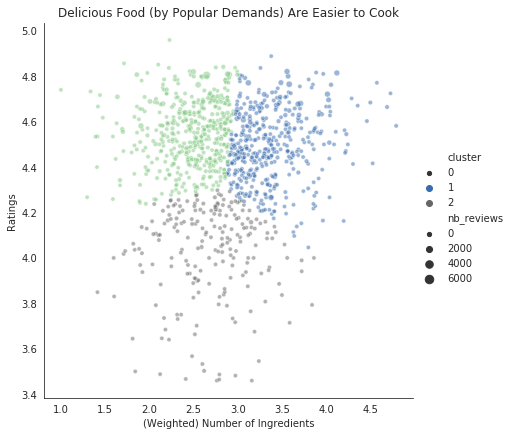

In [25]:
sns.set_style(style='white')
g = sns.relplot(x='nb_ingredients', y='ratings',
             size='nb_reviews', hue = 'cluster',
             alpha=0.5, height = 6, palette='Accent',
             data=plot2_df)
g.set(xlabel='(Weighted) Number of Ingredients', ylabel='Ratings',
      title='Delicious Food (by Popular Demands) Are Easier to Cook')
# g.savefig("figure2.png")

## Development Plan

For the 8-week capstone, we can develop more nuanced metrics that represent the three pillars of this proposal: convenience, health, taste. 
* **Convenience**: Instead of just time to finish and ingredient availability, we can add localization of ingredients (scraping more datasets), ease of substitution (graph analysis), instruction complexity (text mining). 
* **Health**: For nutritions, we can find a more objective and academically rigorous representations of a healthy meal, and plan not just for one meal but for the day or even week. 
* **Taste**: And instead of overall popularity as deliciousness, we can build a recommendation engine for each person based on user reviews (collaborative filtering).

Past works done with similar datasets include simple exploration (Kimmel, 2016), recipe similarity (Hunt, 2004), recipe recommendation based on ingredient networks (Teng et al, 2012), and recipe generation (Ahn et al, 2011; Varshney et al, 2013). This proposal, to the best of our knowledge, is novel in its approach of combining nutritional benefits with prefrences and convenience.

## References

* Ahn, Y., Ahnert, S. E., Bagrow, J. P., & Barabási, A. (2011). Flavor network and the principles of food pairing. Scientific Reports, 1(1). doi:10.1038/srep00196
* Hunt, T. D. (2004). U.S. Patent No. US7299245B2. Washington, DC: U.S. Patent and Trademark Office.
* Institute of Medicine (US) Committee to Review Dietary Reference Intakes for Vitamin D and Calcium. (1970). - Dietary Reference Intakes for Calcium and Vitamin D - NCBI Bookshelf. Retrieved from https://www.ncbi.nlm.nih.gov/books/NBK56068/table/summarytables.t2/?report=objectonly
* Kimmel, Y. (2016). All the recipes: Scraping the top 20 recipes of allrecipes. Retrieved from https://nycdatascience.com/blog/student-works/recipes-scraping-top-20-recipes-allrecipes/
* Overweight & Obesity. (2018, June 12). Retrieved from https://www.cdc.gov/obesity/data/adult.html
* Pew Research Center (2006). Eating More; Enjoying Less. Retrieved from http://www.pewsocialtrends.org/2006/04/19/eating-more-enjoying-less/
* Teng, C., Lin, Y., & Adamic, L. A. (2012). Recipe recommendation using ingredient networks. Retrieved from https://arxiv.org/abs/1111.3919.
* Varshney, L. R., Pinel, F., Varshney, K. R., Bhattacharjya, D., Schoergendorfer, A., & Chee, Y. (2013). A Big Data Approach to Computational Creativity. Retrieved from https://arxiv.org/abs/1311.1213.